<a href="https://colab.research.google.com/github/Void-Brain70/Deep_Learning/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
from IPython.display import Image
u = files.upload()

Saving Cifar10.PNG to Cifar10.PNG


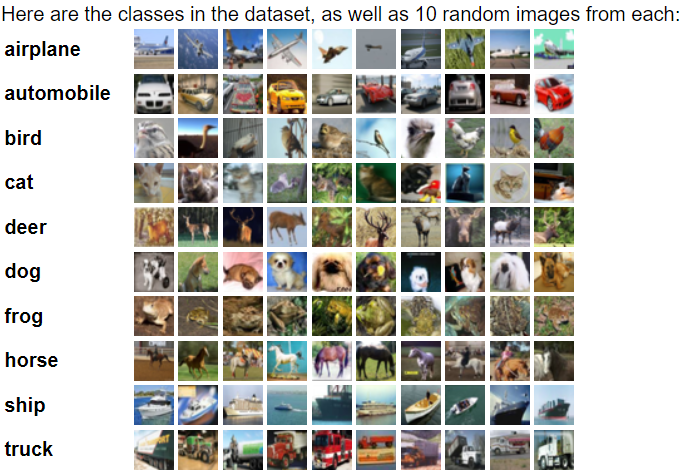

In [ ]:
Image('Cifar10.PNG',width=900)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# reshape 2d to 1d 
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
classes[8]

'ship'

In [10]:
def Showimage(x,y,i):
 plt.figure(figsize=(15,2))
 plt.imshow(x[i])
 plt.xlabel(classes[y[i]])

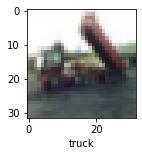

In [11]:
Showimage(x_train,y_train,2)

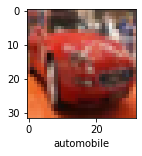

In [12]:
Showimage(x_train,y_train,5)

In [13]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
from google.colab import files 
from IPython.display import Image
u = files.upload()

Saving cross.PNG to cross.PNG


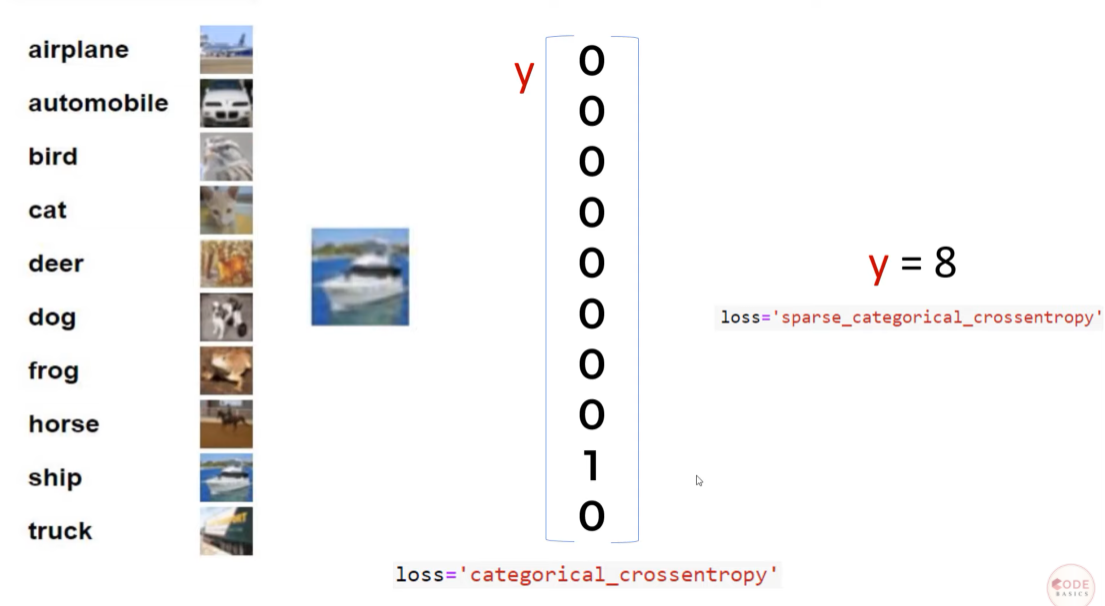

In [ ]:
Image('cross.PNG',width=700)

In [14]:
# ANN model build
# 32*32*3 = 3072
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# ANN model compile
ann.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the ANN
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8157 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6267 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5421 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.4828 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4315 - accuracy: 0.4975


In [15]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.4525 - accuracy: 0.4827


[1.4524627923965454, 0.482699990272522]

In [16]:
# Classification Report
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report->",classification_report(y_test,y_pred_classes))


Classification Report->               precision    recall  f1-score   support

           0       0.52      0.61      0.56      1000
           1       0.59      0.62      0.60      1000
           2       0.30      0.54      0.38      1000
           3       0.39      0.19      0.26      1000
           4       0.47      0.29      0.36      1000
           5       0.38      0.44      0.41      1000
           6       0.62      0.36      0.46      1000
           7       0.61      0.51      0.56      1000
           8       0.60      0.63      0.61      1000
           9       0.53      0.63      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [17]:
from google.colab import files 
from IPython.display import Image
u = files.upload()

Saving CNN.PNG to CNN.PNG


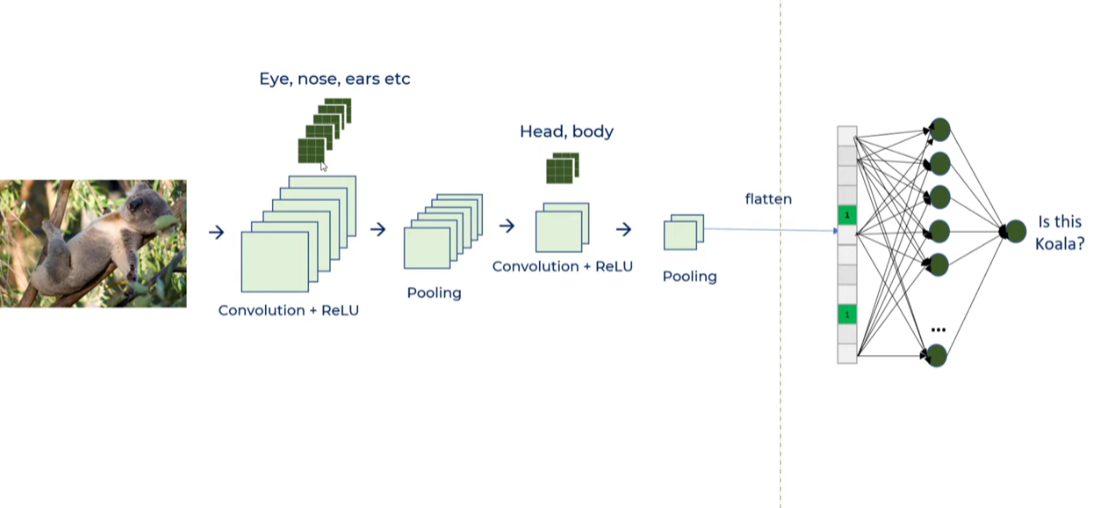

In [18]:
Image('CNN.PNG',width=700)

In [19]:
# CNN Dense model build
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),    
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# CNN model compile
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the CNN
cnn.fit(x_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5031 - accuracy: 0.4573
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1266 - accuracy: 0.6064
Epoch 3/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9974 - accuracy: 0.6539
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9158 - accuracy: 0.6825
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8512 - accuracy: 0.7059


In [ ]:
# for sigmoid
# class 1 = 0.45
# class 2 = 0.67

# for softmax
# class 1 (0.45)/(0.45+0.67)
# class 1 (0.67)/(0.45+0.67)

In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9443 - accuracy: 0.6803


[0.9443471431732178, 0.6802999973297119]

In [21]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

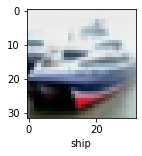

In [22]:
Showimage(x_test,y_test,1)

In [23]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.8435786e-03, 8.3898092e-05, 1.4174387e-03, 8.3200121e-01,
        3.2269125e-04, 1.2586461e-01, 9.1788955e-03, 7.4199917e-05,
        2.7554970e-02, 6.5847946e-04],
       [9.7745210e-03, 3.4008548e-01, 1.8436958e-05, 3.3388089e-06,
        8.3814666e-07, 2.3250452e-06, 2.6543773e-07, 2.4854505e-06,
        6.4381146e-01, 6.3008410e-03],
       [2.2854490e-02, 3.7912883e-02, 1.4824037e-03, 4.1331891e-03,
        9.5106196e-04, 1.3367991e-03, 8.8817545e-04, 7.9380127e-04,
        9.2638493e-01, 3.2623163e-03],
       [2.3743317e-01, 9.8991236e-03, 5.0792960e-03, 1.1474076e-03,
        6.1228755e-03, 9.2521848e-05, 1.0414596e-03, 4.9122688e-03,
        7.3420256e-01, 6.9354377e-05],
       [1.4759423e-04, 7.8355093e-05, 2.4730405e-02, 5.4034680e-02,
        7.1826810e-01, 9.3371077e-03, 1.9290090e-01, 2.7525940e-04,
        1.5817479e-04, 6.9447698e-05]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

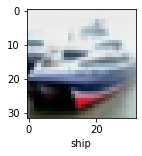

In [25]:
Showimage(x_test,y_test,1)

In [26]:
classes[y_classes[1]]

'ship'

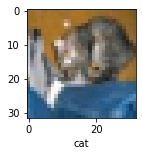

In [ ]:
Showimage(x_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'

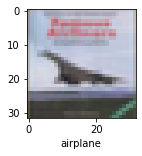

In [ ]:
Showimage(x_test,y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
print("Classification Report->",classification_report(y_test,y_classes))

Classification Report->               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.84      0.79      0.82      1000
           2       0.53      0.61      0.57      1000
           3       0.56      0.43      0.49      1000
           4       0.68      0.53      0.59      1000
           5       0.56      0.62      0.59      1000
           6       0.82      0.69      0.75      1000
           7       0.63      0.82      0.71      1000
           8       0.76      0.80      0.78      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

